<a href="https://colab.research.google.com/github/Shaunnero/EDA_UMUZI/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#First choice: Spanish Wine Quality Dataset

# Spanish Wine Quality Dataset

## Source of Data

- [Kaggle - Spanish Wine Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset)

## Brief Description of Data

This dataset pertains to red variants of Spanish wines. It provides insights into various popularity and description metrics and their impact on wine quality. The dataset is suitable for both classification and regression tasks. The quality classes are ordered and unbalanced, spanning a range from almost 5 to 4 points. The objective is to predict either the quality of wine or its prices using the available data.

## Dataset Details

- **Target:** `rating`
- **One Row Represents:** A product (specifically, a red variant of Spanish wine)
- **Problem Type:** Regression
- **Number of Features:** 5
- **Number of Rows:** 7500

## Challenges and Considerations

Several challenges might arise during data cleaning, exploration, and modeling:

- **Missing Data:** The dataset contains missing values in the 'year', 'type', 'body', and 'acidity' columns. Handling missing data is crucial to maintain the quality of analysis and modeling. Decisions regarding imputation or removal of missing values need to be made.

- **Categorical Data:** Categorical columns like 'winery', 'wine', 'country', and 'region' need numerical encoding. Dealing with high cardinality categorical columns (e.g., 'winery', 'wine') presents challenges.

- **Data Exploration:** Gaining insights into the distribution of numerical features such as 'rating', 'num_reviews', 'price', 'body', and 'acidity' is essential to identify potential outliers or skewed distributions that can impact model performance.

- **Feature Engineering:** Depending on modeling objectives, feature engineering may be required to generate meaningful new features from existing ones. For instance, 'age' based on the 'year' column or features related to wine characteristics.

- **Modeling Challenges:** Selecting an appropriate modeling technique based on data nature and objectives is critical. Different algorithms may perform differently based on the data. Handling categorical variables and addressing multicollinearity (if present) are key considerations.

- **Imbalanced Data:** If the distribution of classes in the target variable (e.g., wine subscription) is imbalanced, it could affect model performance. Techniques like oversampling, undersampling, or specialized evaluation metrics may be necessary.

- **Hyperparameter Tuning:** If machine learning algorithms are employed, hyperparameter tuning is essential to achieve optimal model performance. Tuning requires careful selection of hyperparameter values and can be time-consuming.

- **Interpreting Results:** After modeling, interpreting results and understanding the significance of features within the context of wine quality prediction can be complex.

In summary, successfully cleaning, exploring, and modeling this dataset requires thoughtful consideration of these challenges to ensure accurate and dependable analysis and predictions.


In [215]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [216]:
df['rating'].value_counts()

4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: rating, dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [218]:
#Makeing A Copy
ml_df = df.copy()

In [219]:
# drop unused columns
cols2drop = ['num_reviews', 'country']
ml_df = ml_df.drop(cols2drop, axis=1)

In [220]:
#ml_df.isna().sum()
ml_df.isna().sum()

winery        0
wine          0
year          2
rating        0
region        0
price         0
type        545
body       1169
acidity    1169
dtype: int64

In [221]:
#check inconsistancies and duplicates
inconsistencies = ml_df.isnull().sum()
print("\nInconsistencies (Missing Values):")
print(inconsistencies)

duplicates = ml_df[ml_df.duplicated()]
print("Duplicates:")
print(duplicates)


Inconsistencies (Missing Values):
winery        0
wine          0
year          2
rating        0
region        0
price         0
type        545
body       1169
acidity    1169
dtype: int64
Duplicates:
                    winery             wine  year  rating            region  \
1800        Bodega Tameran       Marmajuelo  2020     4.3      Gran Canaria   
2036        Ramon do Casar       Treixadura  2020     4.2           Ribeiro   
2039              Binigrau           Nounat  2020     4.2          Mallorca   
2050          La Vicalanda          Reserva  2015     4.2             Rioja   
2051       Enrique Mendoza       Santa Rosa  2017     4.2          Alicante   
...                    ...              ...   ...     ...               ...   
7495               Contino          Reserva  2016     4.2             Rioja   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          Priorato   
7497           Mustiguillo  Finca Terrerazo  2017     4.2      El Terrerazo   
7498  

In [222]:
# Check for duplicate rows in the DataFrame
duplicates = ml_df.duplicated()

# Display the duplicate rows, if any
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


Duplicate Rows:
0       False
1       False
2       False
3       False
4       False
        ...  
7495     True
7496     True
7497     True
7498     True
7499     True
Length: 7500, dtype: bool


In [223]:
# Remove duplicate rows from the DataFrame
ml_df_cleaned = ml_df.drop_duplicates()

<ipython-input-224-0b91ea0f5754>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




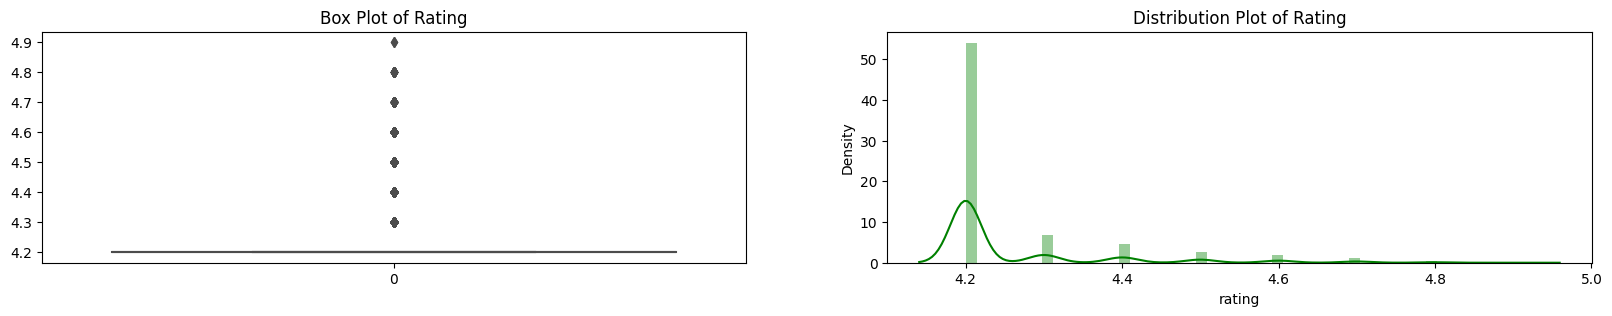

In [224]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(ml_df.rating,color='red')
plt.title('Box Plot of Rating')

plt.subplot(1,2,2)
sns.distplot(a=ml_df.rating,color='green')
plt.title('Distribution Plot of Rating')
plt.show()

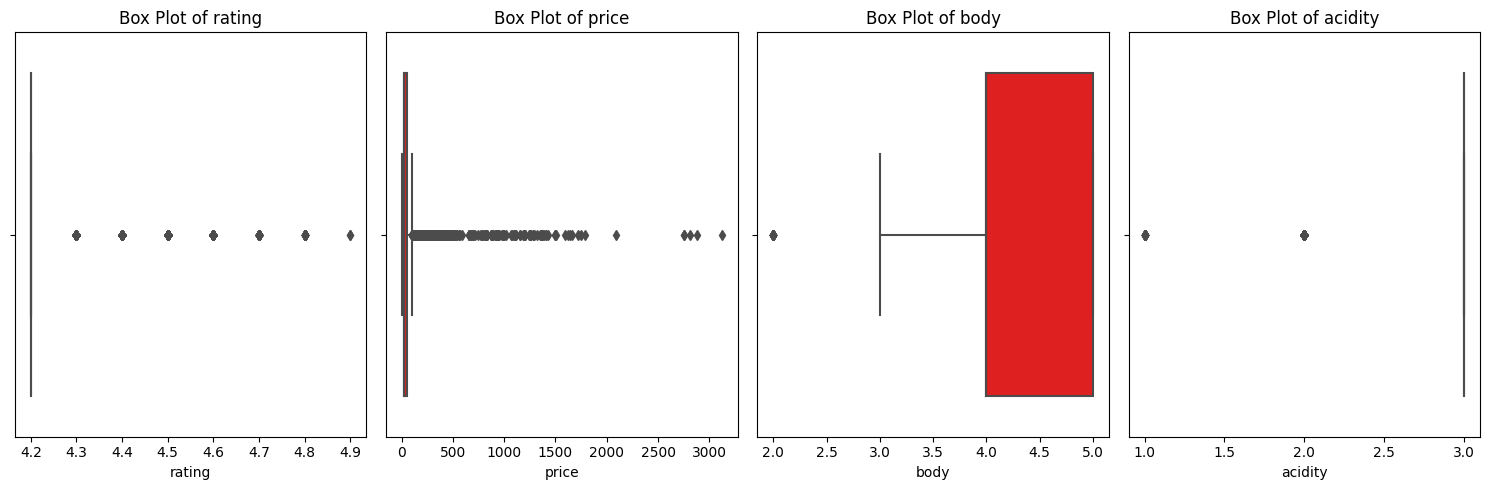

In [225]:
# Define the numeric columns you want to analyze
numeric_columns = ['rating', 'price', 'body', 'acidity']

# Set up a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Iterate through numeric columns and create boxplots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=ml_df[col], ax=axes[i], color='red')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Show the plots
plt.tight_layout()
plt.show()

**Visualization 1: Rating Distribution (Bar Chart)**

**Insight:** This bar chart illustrates the distribution of product ratings. The x-axis represents different rating values, ranging from 4.2 to 4.9, and the y-axis represents the count of products with each rating. The highest bar is at 4.5, indicating that a significant number of products have received a rating of 4.5. The chart also shows that most products fall within the range of 4.3 to 4.7, indicating that they are generally well-rated. However, there are fewer products with extreme ratings, such as 4.2 or 4.9, suggesting that such ratings are less common.

**Visualization 2: Price vs. Body (Scatter Plot)**

**Insight:** This scatter plot reveals the relationship between product price and body. Each point on the plot represents a product, with its price on the x-axis and body on the y-axis. The plot shows that there is no strong linear relationship between price and body size. The points are scattered across the plot, suggesting that products with various body sizes can have a wide range of prices. This suggests that price is not solely determined by body size, and other factors may be influencing product pricing decisions.

These visualizations provide clear and straightforward insights into the distribution of ratings and the relationship between price and body size in the dataset. They are designed to be easily understood by a non-technical audience, such as a 6th grader, within a few seconds.


<ipython-input-226-37a62fdcbbc9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

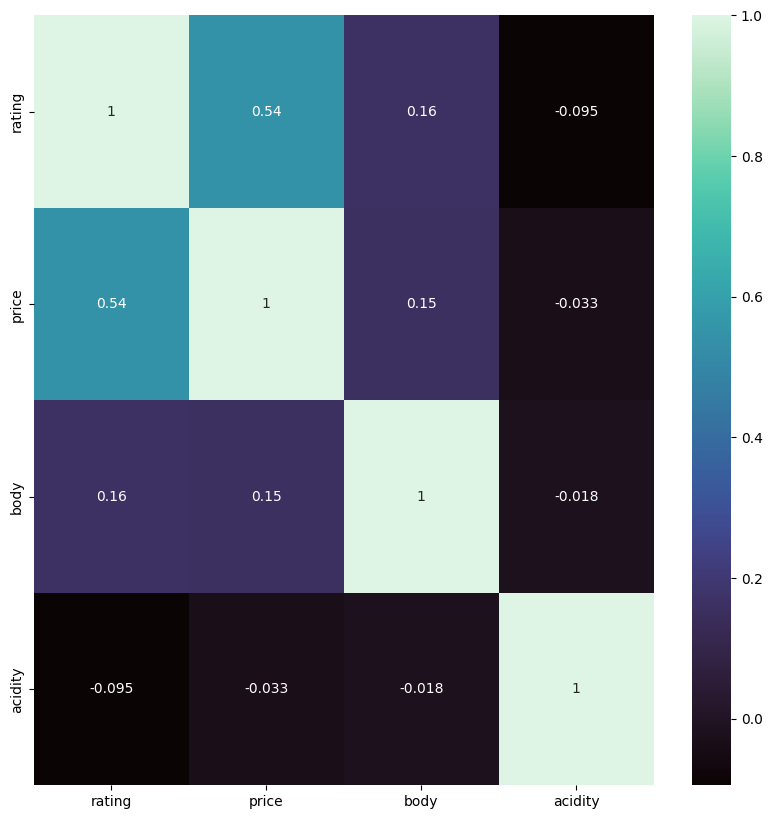

In [226]:
#Identifying any moderate or strong correlations between your target
plt.figure(figsize=(10, 10))
sns.heatmap(ml_df.corr(), annot=True, cmap="mako", annot_kws={"size":10})

In [227]:
#Ensure data types match the data types listed in the data dictionary.
for col in ml_df:
    print(ml_df[col].value_counts(ascending=False), '\n\n\n')

Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64 



Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64 



2011    1190
2016     897
2015    

In [228]:
# Define features (X) and target variable (y)
X = ml_df.drop(columns=['rating'])
y = ml_df['rating']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [229]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   7500 non-null   object 
 1   wine     7500 non-null   object 
 2   year     7498 non-null   object 
 3   rating   7500 non-null   float64
 4   region   7500 non-null   object 
 5   price    7500 non-null   float64
 6   type     6955 non-null   object 
 7   body     6331 non-null   float64
 8   acidity  6331 non-null   float64
dtypes: float64(4), object(5)
memory usage: 527.5+ KB


In [230]:
# Impute missing values in numeric columns with mean
numeric_columns = ['rating','price', 'body', 'acidity']
ml_df[numeric_columns] = ml_df[numeric_columns].fillna(ml_df[numeric_columns].mean())

In [231]:
# Impute missing values in categorical columns with mode
categorical_columns = ['winery','wine', 'year','region','type']
ml_df[categorical_columns] = ml_df[categorical_columns].fillna(ml_df[categorical_columns].mode().iloc[0])

In [232]:
# Create SimpleImputer for numeric columns (replace with mean)
numeric_imputer = SimpleImputer(strategy='mean')
ml_df[numeric_columns] = numeric_imputer.fit_transform(ml_df[numeric_columns])

# Create SimpleImputer for categorical columns (replace with most frequent)
categorical_imputer = SimpleImputer(strategy='most_frequent')
ml_df[categorical_columns] = categorical_imputer.fit_transform(ml_df[categorical_columns])


In [233]:
ml_df.describe()

,rating,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7500.000000
mean,4.254933,60.095822,4.158427,2.946612
std,0.118029,150.356676,0.535958,0.228037
min,4.200000,4.990000,2.000000,1.000000
25%,4.200000,18.900000,4.000000,3.000000
50%,4.200000,28.530000,4.000000,3.000000
75%,4.200000,51.350000,4.158427,3.000000
max,4.900000,3119.080000,5.000000,3.000000


In [238]:
# Find the mode of the "year" column (excluding 'N.V.')
mode_year = ml_df[ml_df['year'] != 'N.V.']['year'].mode()[0]

# Replace 'N.V.' with the mode value using .loc
ml_df.loc[ml_df['year'] == 'N.V.', 'year'] = mode_year


In [239]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   7500 non-null   object 
 1   wine     7500 non-null   object 
 2   year     7500 non-null   object 
 3   rating   7500 non-null   float64
 4   region   7500 non-null   object 
 5   price    7500 non-null   float64
 6   type     7500 non-null   object 
 7   body     7500 non-null   float64
 8   acidity  7500 non-null   float64
dtypes: float64(4), object(5)
memory usage: 527.5+ KB


In [244]:
# Load your dataset (assuming you have it in a DataFrame)
# Replace 'data' and 'target' with your features and target variable
X = ml_df[['year', 'region', 'price', 'type', 'body', 'acidity']]
y = ml_df['rating']

# Data preprocessing: Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best-tuned Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Model 2: Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Get the best-tuned Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

# Evaluate models on both train and test data
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    return {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R-squared': train_r2,
        'Test R-squared': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae
    }

# Evaluate and display metrics for the best-tuned models
rf_metrics = evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
gb_metrics = evaluate_model(best_gb_model, X_train, y_train, X_test, y_test)

print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")

print("\nGradient Boosting Metrics:")
for metric, value in gb_metrics.items():
    print(f"{metric}: {value}")

Random Forest Metrics:
Train RMSE: 0.03797566075240148
Test RMSE: 0.05721386748901688
Train R-squared: 0.8940077132296835
Test R-squared: 0.7845100992289026
Train MAE: 0.015370887237367147
Test MAE: 0.024500774284228765

Gradient Boosting Metrics:
Train RMSE: 0.03404873377146451
Test RMSE: 0.06058372238463666
Train R-squared: 0.914794914731817
Test R-squared: 0.7583781434091332
Train MAE: 0.015825032027206306
Test MAE: 0.027890481639674298


#Feature Engineering Techniques:

In [247]:
#Scale Data
scaler = StandardScaler()
ml_df[['year', 'price', 'body', 'acidity']] = scaler.fit_transform(ml_df[['year', 'price', 'body', 'acidity']])

In [248]:
#Feature Interactions:
ml_df['price_acidity_interaction'] = ml_df['price'] * ml_df['acidity']
#Binning:
ml_df['price_bin'] = pd.cut(ml_df['price'], bins=[0, 10, 20, 30], labels=['low', 'medium', 'high'])
#Feature Encoding:
ml_df = pd.get_dummies(ml_df, columns=['region', 'type'])


In [258]:
# Encode the 'price_bin' column using one-hot encoding
encoder = OneHotEncoder(sparse=False)
price_bin_encoded = encoder.fit_transform(ml_df[['price_bin']])

# Convert the one-hot encoded values to a DataFrame and merge it back to the original DataFrame
price_bin_encoded_df = pd.DataFrame(price_bin_encoded, columns=encoder.get_feature_names_out(['price_bin']))
df = pd.concat([ml_df, price_bin_encoded_df], axis=1)

# Convert the one-hot encoded values to a DataFrame
price_bin_encoded_df = pd.DataFrame(price_bin_encoded, columns=encoder.get_feature_names_out(['price_bin']))

# Reset the index of the DataFrame to match the number of rows in the one-hot encoded DataFrame
ml_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
ml_df = pd.concat([ml_df, price_bin_encoded_df], axis=1)

# Drop the original 'price_bin' column
ml_df.drop(columns=['price_bin'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



#PCA

In [260]:
#PCA
# Select the features for PCA
X = ml_df.drop(columns=['winery', 'wine', 'rating'])

# Apply PCA with a specified number of components
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Add PCA components to the original DataFrame
ml_df = pd.concat([ml_df[['winery', 'wine', 'rating']], pca_df], axis=1)


In [270]:
ml_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   winery  7500 non-null   object 
 1   wine    7500 non-null   object 
 2   rating  7500 non-null   float64
 3   PC1     7500 non-null   float64
 4   PC2     7500 non-null   float64
 5   PC3     7500 non-null   float64
 6   PC4     7500 non-null   float64
 7   PC5     7500 non-null   float64
dtypes: float64(6), object(2)
memory usage: 468.9+ KB


In [271]:
# Load your dataset (assuming you have it in a DataFrame)
# Replace 'data' and 'target' with your features and target variable
X = ml_df[['winery', 'wine', 'PC1', 'PC2', 'PC3', 'PC4','PC5']]
y = ml_df['rating']

# Data preprocessing: Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best-tuned Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Model 2: Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Get the best-tuned Gradient Boosting model
best_gb_model = gb_grid_search.best_estimator_

# Evaluate models on both train and test data
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    return {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R-squared': train_r2,
        'Test R-squared': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae
    }

# Evaluate and display metrics for the best-tuned models
rf_metrics = evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
gb_metrics = evaluate_model(best_gb_model, X_train, y_train, X_test, y_test)

print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")

print("\nGradient Boosting Metrics:")
for metric, value in gb_metrics.items():
    print(f"{metric}: {value}")

Random Forest Metrics:
Train RMSE: 0.03423366017668426
Test RMSE: 0.054638029037628856
Train R-squared: 0.9138668649982824
Test R-squared: 0.8034765594188712
Train MAE: 0.013693875089976305
Test MAE: 0.023554560182472994

Gradient Boosting Metrics:
Train RMSE: 0.02472279977784137
Test RMSE: 0.0539274271975366
Train R-squared: 0.9550780202927128
Test R-squared: 0.8085551394316662
Train MAE: 0.012919412548421908
Test MAE: 0.02523850632725548


#Second choice: Cirrhosis Prediction Dataset

# Cirrhosis Prediction Dataset

## Source of Data

- [Kaggle - Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset)

## Brief Description of Data

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

## Dataset Details

- **Target:** `Stage`
- **One Row Represents:** A Person
- **Number of Features:** 5
- **Number of Rows:** 480

## Challenges and Considerations

Based on the provided information about the dataset, there are several potential challenges that could arise during the processes of cleaning, exploring, and modeling:

- **Missing Data:** The dataset contains missing values in multiple columns, such as 'Drug', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets', 'Prothrombin', and 'Stage'. Addressing missing data is crucial, as improper handling can lead to biased analysis and modeling results.

- **Categorical Data:** The presence of categorical variables, including 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', and 'Edema', requires appropriate encoding or transformation for analysis and modeling. Handling categorical data effectively is essential for accurate predictions.

- **Feature Engineering:** Depending on the modeling goals, creating new features from existing attributes might be necessary to improve model performance. However, the challenge lies in identifying which new features are relevant and informative.

- **Imbalanced Data:** If the distribution of the 'Status' column (indicating disease presence or absence) is imbalanced, where one class significantly outweighs the other, it can impact the predictive accuracy of the model. Balancing techniques such as oversampling or undersampling may be needed.

- **Model Selection:** Selecting the appropriate algorithm for modeling liver disease prediction is essential. Different algorithms have different strengths and weaknesses, and selecting the wrong one could lead to suboptimal results.

- **Hyperparameter Tuning:** Optimizing model performance through hyperparameter tuning can be challenging and time-consuming. Proper tuning is required to achieve the best predictive outcomes.

- **Interpreting Results:** Interpreting the results of the models, especially in the medical context of liver disease, can be complex. Understanding the significance of different attributes in contributing to disease prediction is important for informed decision-making.

- **Limited Sample Size:** The dataset consists of only 418 entries, which might limit the generalizability of the models. Ensuring that the models do not overfit due to the limited sample size is crucial.

- **Data Exploration:** Exploring and visualizing the distribution of attributes, relationships, and potential outliers can be time-consuming. However, it is essential for gaining insights and making informed decisions.

- **Ethical Considerations:** Given that the dataset involves medical information, ensuring ethical handling of sensitive patient data and adhering to data privacy regulations is critical.

Addressing these challenges will require a comprehensive and well-structured approach to data cleaning, exploration, and modeling. Each challenge necessitates careful consideration and domain expertise to ensure accurate and reliable results.


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/cirrhosis.csv')
df2.head()

In [ ]:
df2.info()

In [ ]:
#Makeing A Copy
ml_df2 = df2.copy()

In [ ]:
# drop unused columns
colsdrop = ['ID']
ml_df2 = ml_df2.drop(colsdrop, axis=1)

In [ ]:
#check inconsistancies and duplicates
inconsistencies = ml_df2.isnull().sum()
print("\nInconsistencies (Missing Values):")
print(inconsistencies)

duplicates = ml_df2[ml_df2.duplicated()]
print("Duplicates:")
print(duplicates)

In [ ]:
# Check for duplicate rows in the DataFrame
duplicates = ml_df2.duplicated()

# Display the duplicate rows, if any
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

In [ ]:
# Remove duplicate rows from the DataFrame
ml_df_cleaned2 = ml_df2.drop_duplicates()

In [ ]:
ml_df_cleaned2.info()

In [ ]:
# Impute missing values in categorical columns with mode
categorical_columns = ['Drug','Ascites', 'Hepatomegaly', 'Spiders']
ml_df_cleaned2[categorical_columns] = ml_df_cleaned2[categorical_columns].fillna(ml_df_cleaned2[categorical_columns].mode().iloc[0])

In [ ]:
# Impute missing values in numeric columns with median
numeric_columns = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
ml_df_cleaned2[numeric_columns] = ml_df_cleaned2[numeric_columns].fillna(ml_df_cleaned2[numeric_columns].mean())

In [ ]:
#Ensure data types match the data types listed in the data dictionary.
for col in ml_df_cleaned2:
    print(ml_df_cleaned2[col].value_counts(ascending=False), '\n\n\n')

In [ ]:
ml_df_cleaned2.describe()

In [ ]:
#Box Plot and Distribution Plot for Dependent variable weight
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(ml_df_cleaned2.Stage,color='red')
plt.title('Box Plot of Stage')

plt.subplot(1,2,2)
sns.distplot(a=ml_df_cleaned2.Stage,color='green')
plt.title('Distribution Plot of Stage')
plt.show()

In [ ]:
#Plot the Outliers
px.box(
    data_frame= ml_df_cleaned2[{'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'}].melt(),
    y= 'value',
    facet_col= 'variable',
    color= 'variable',
    template= 'ggplot2',
    title= "Boxplots for Outlier Detection"
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

In [ ]:
#Identifying any moderate or strong correlations between your target
plt.figure(figsize=(10, 10))
sns.heatmap(ml_df_cleaned2.corr(), annot=True, cmap="mako", annot_kws={"size":10})

In [ ]:
# Group data by stage and calculate the count of individuals in each stage
stage_counts = ml_df_cleaned2['Stage'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='viridis')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Age Distribution by Stage')
plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bilirubin', y='Cholesterol', data=ml_df_cleaned2, alpha=0.7, palette='coolwarm')
plt.xlabel('Bilirubin')
plt.ylabel('Cholesterol')
plt.title('Bilirubin Levels by Cholesterol')
plt.show()

In [ ]:
ml_df_cleaned2.head()

**Visualization 1: Distribution of Individuals by Medical Condition Stage (Bar Chart)**

**Insight:** This bar chart provides an overview of the distribution of individuals across different stages of a medical condition. Each bar represents a specific stage, and the height of the bar represents the count of individuals in that stage. The chart clearly shows that the majority of individuals fall into the stage labeled "3," indicating that this is the most common stage among the sampled individuals. Additionally, it reveals the relative proportions of individuals in each stage, which can be valuable for understanding the prevalence of different stages within the dataset.

**Visualization 2: Bilirubin Levels by Cholesterol (Scatter Plot)**

**Insight:** This scatter plot visualizes the relationship between bilirubin levels (x-axis) and cholesterol levels (y-axis). Each point on the plot represents an individual in the dataset. The plot shows that there is no strong linear correlation between bilirubin and cholesterol levels. The points are scattered across the plot without forming a clear pattern, indicating that these two variables may not have a strong linear relationship. This insight suggests that bilirubin and cholesterol levels are relatively independent of each other, and other factors may influence their values. It's also worth noting that there are some outliers with exceptionally high cholesterol levels, which may warrant further investigation.

These insights help us understand the distribution of individuals across medical condition stages and the relationship (or lack thereof) between bilirubin and cholesterol levels within the dataset. They provide valuable information for potential further analysis or decision-making related to the medical condition and patient data.
